In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [4]:
data = pd.read_csv('starts.csv')
regions = pd.read_csv('regions.csv')

In [8]:
#merging tables and removing duplicates
data = data.merge(regions, on='region', how='left')
unique_runners = data.drop_duplicates(subset=['region', 'athlete_id'])

In [16]:
unique_runners.shape

(37537, 163)

In [15]:

unique_runners.athlete_id.nunique()

31658

~ 6 тысяч бегали в более чем одном регионе

In [ ]:
#share of newbies by regions
newbie_ratios = (
    unique_runners
    .groupby('region', as_index=False)
    .agg(newbie_ratio=('is_newbie', lambda x: x.sum() / len(x)))
)

Проверим распределение на нормальность

<Axes: xlabel='newbie_ratio', ylabel='Count'>

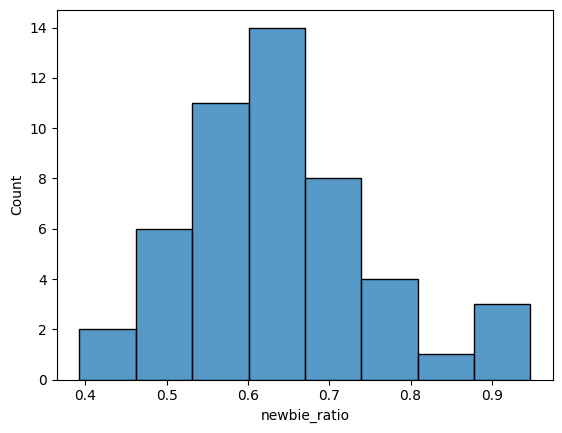

In [22]:
sns.histplot(newbie_ratios.newbie_ratio)

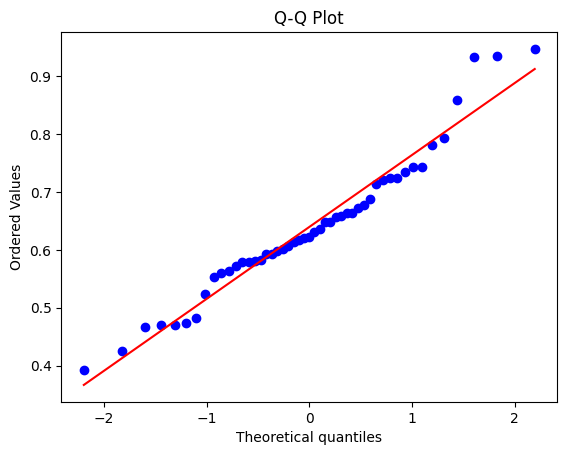

In [28]:
stats.probplot(newbie_ratios.newbie_ratio, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Все отлично за исключением хвоста в конце

In [29]:
stats.shapiro(newbie_ratios.newbie_ratio)

ShapiroResult(statistic=0.9577603279241281, pvalue=0.07661829586537218)

Можем считать распределение нормальным